# Reading in the Data

In [1]:
#Import the libraries we need for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Import iris data
iris = pd.read_csv("C:\Users\gerr1\Desktop\Data Science Portfolio\data\Iris.csv")

print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [2]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We see the data is already fairly clean, no missing values

In [3]:
#Let's see how many of each species we have
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
predictors = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B8F6BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C61D2B0>]], dtype=object)

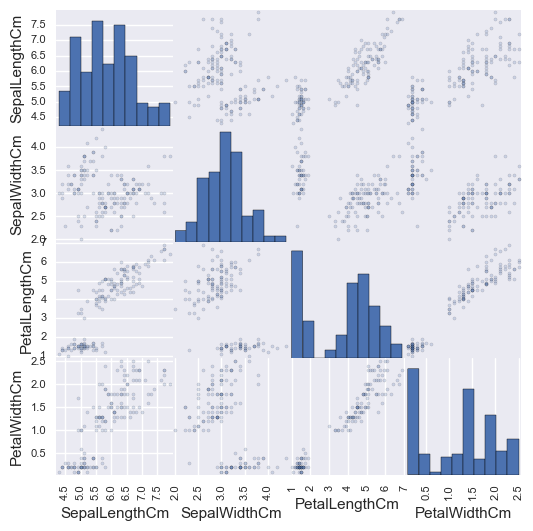

In [7]:
from pandas.tools.plotting import scatter_matrix

#Make a scatter matrix of the features to see initial relationship
scatter_matrix(iris[predictors], alpha=0.2, figsize=(6,6))

In [8]:
#Now we want to map the species to dummy variables so we can use them
mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

iris["Species"] = iris["Species"].map(mapping)

In [9]:
#Now we have dummy variables for our target feature
iris["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

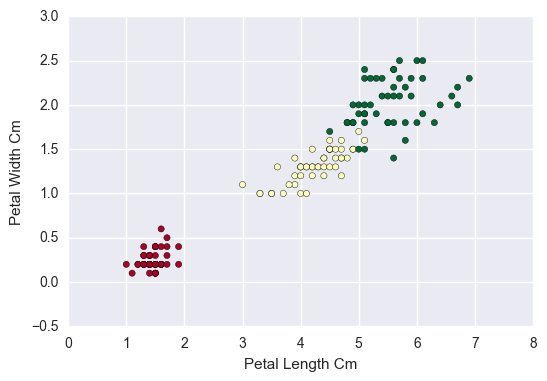

In [37]:
#Plotting Petal Length vs Petal Width with species as color labels
plt.scatter(x=iris["PetalLengthCm"], y=iris["PetalWidthCm"], c=iris["Species"], cmap=plt.cm.RdYlGn)
plt.xlabel("Petal Length Cm")
plt.ylabel("Petal Width Cm")
plt.show()

There seems to be a pretty clear grouping of species based on petal size.

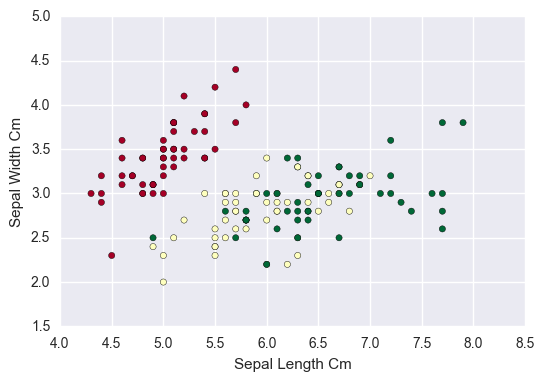

In [34]:
#Plotting Sepal Length vs Sepal Width with species as color labels
plt.scatter(x=iris["SepalLengthCm"], y=iris["SepalWidthCm"], c=iris["Species"], cmap=plt.cm.RdYlGn)
plt.xlabel("Sepal Length Cm")
plt.ylabel("Sepal Width Cm")
plt.show()

There seems to be a less defined pattern amongst species when it comes to sepal size. Although one species definitely has a more distinctive sepal size.

# Using a K-Nearest Neighbors Classifier to predict Species

In [11]:
#Now shuffling data since it is organized by species
from sklearn.utils import shuffle

iris = shuffle(iris)

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
133,134,6.3,2.8,5.1,1.5,2
141,142,6.9,3.1,5.1,2.3,2
94,95,5.6,2.7,4.2,1.3,1
144,145,6.7,3.3,5.7,2.5,2
137,138,6.4,3.1,5.5,1.8,2


In [19]:
import math

#Splitting data into test and train data, later we will use k-fold evaluation, but for now we will use 75:25, trian:test
len_train_data = int(math.ceil(iris.shape[0]*0.75))
train = iris.iloc[:len_train_data]
test = iris.iloc[len_train_data:]

print(train.shape[0])
print(test.shape[0])

113
37


In [26]:
#Now that we have a train and a test set, we will train our initial knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

#Now we fit the model
knn.fit(train[predictors], train["Species"])

#Now we make a prediction on our test set
prediction = knn.predict(test[predictors])
print(prediction)

[0 0 0 2 1 1 1 1 1 2 1 0 2 1 1 2 0 2 1 2 0 1 0 2 0 1 1 1 2 2 2 2 1 1 2 1 2]


In [27]:
#Time to check the accuracy of our model (you can use accuracy_score or the KNN score method)
from sklearn.metrics import accuracy_score

#test_accuracy = accuracy_score(test["Species"], prediction)
#print(test_accuracy)

knn.score(test[predictors], test["Species"])

0.97297297297297303

It seems that I have gotten an accuracy of 97.3% with my K-Nearest Neighbors Classifier which seems suspiciously high. We must investigate using some cross validation. Let's do a quick graph of our nearest neighbors.

# Cross Validation

In [47]:
# from sklearn import cross_validation

#Instantiating a KFold cross validator
kf = cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)

#Now we will train the KNN classifier using our KFold cross validation
score = cross_validation.cross_val_score(knn, train[predictors], train["Species"], cv=kf)
print(score.mean())

0.964438122333
